# Classifying Fashion-MNIST

Agora é sua vez de construir e treinar uma rede neural. Você usará o [conjunto de dados Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist), um substituto imediato para o conjunto de dados MNIST. Na verdade, o MNIST é bastante trivial com redes neurais, onde você pode facilmente obter uma precisão superior a 97%. Fashion-MNIST é um conjunto de imagens de roupas em tons de cinza 28x28. É mais complexo que o MNIST, por isso é uma representação melhor do desempenho real da sua rede e uma representação melhor dos conjuntos de dados que você usará no mundo real.

<img src='assets/fashion-mnist-sprite.png' largura=500px>

Neste caderno, você construirá sua própria rede neural. Na maioria das vezes, você poderia simplesmente copiar e colar o código da Parte 3, mas não estaria aprendendo. É importante que você mesmo escreva o código e faça com que ele funcione. Sinta-se à vontade para consultar os cadernos anteriores enquanto trabalha nisso.

Primeiro, vamos carregar o conjunto de dados por meio do torchvision.

In [9]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Aqui podemos ver uma das imagens.

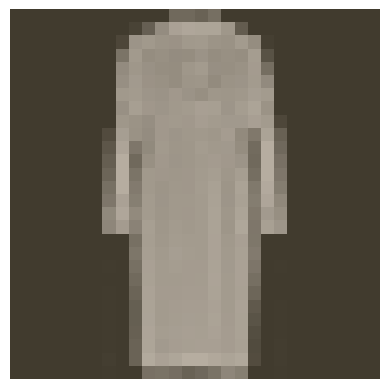

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Aqui você deve definir sua rede. Tal como acontece com o MNIST, cada imagem tem 28x28, o que dá um total de 784 pixels, e há 10 classes. Você deve incluir pelo menos uma camada oculta. Sugerimos que você use ativações ReLU para as camadas e retorne os logits ou log-softmax do forward pass. Depende de você quantas camadas você adiciona e o tamanho dessas camadas.

In [4]:
# TODO: Define your network architecture here
from torch import nn
import torch.nn.functional as F

model = nn.Sequential(
    nn.Linear(784, 256),  # Camada de entrada com 784 unidades e camada oculta com 256 unidades
    nn.ReLU(),             # Função de ativação ReLU após a primeira camada oculta
    nn.Linear(256, 128),  # Segunda camada oculta com 256 unidades de entrada e 128 unidades de saída
    nn.ReLU(),             # Função de ativação ReLU após a segunda camada oculta
    nn.Linear(128, 64),   # Terceira camada oculta com 128 unidades de entrada e 64 unidades de saída
    nn.ReLU(),             # Função de ativação ReLU após a terceira camada oculta
    nn.Linear(64, 10),    # Camada de saída com 64 unidades de entrada e 10 unidades de saída
    nn.LogSoftmax(dim=1)  # Camada de log-softmax para converter os logits em probabilidades logarítmicas
)


# Train the network

Agora você deve criar sua rede e treiná-la. Primeiro você vai querer definir [o critério](http://pytorch.org/docs/master/nn.html#loss-functions) (algo como `nn.CrossEntropyLoss`) e [o otimizador](http:/ /pytorch.org/docs/master/optim.html) (normalmente `optim.SGD` ou `optim.Adam`).

Em seguida, escreva o código de treinamento. Lembre-se de que o passe de treinamento é um processo bastante simples:

* Faça uma passagem direta pela rede para obter os logits
* Use os logits para calcular a perda
* Execute uma passagem para trás pela rede com `loss.backward()` para calcular os gradientes
* Dê um passo com o otimizador para atualizar os pesos

Ao ajustar os hiperparâmetros (unidades ocultas, taxa de aprendizado, etc.), você poderá obter a perda de treinamento abaixo de 0,4.

In [12]:
# TODO: Create the network, define the criterion and optimizer

# Define the loss
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
# TODO: Train the network here
# Number of epochs
epochs = 7

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        # Clear the gradients
        optimizer.zero_grad()
        
        # Forward pass
        output = model(images)
        
        # Calculate the loss
        loss = criterion(output, labels)
        
        # Backward pass
        loss.backward()
        
        # Take a step with the optimizer to update the weights
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Epoch {e+1}/{epochs} - Training loss: {running_loss/len(trainloader)}")


Epoch 1/7 - Training loss: 0.4073143066055993
Epoch 2/7 - Training loss: 0.3922904132684665
Epoch 3/7 - Training loss: 0.3864730773513505
Epoch 4/7 - Training loss: 0.38982034366585805
Epoch 5/7 - Training loss: 0.3842436646474704
Epoch 6/7 - Training loss: 0.37747822645535345
Epoch 7/7 - Training loss: 0.38212170273160884


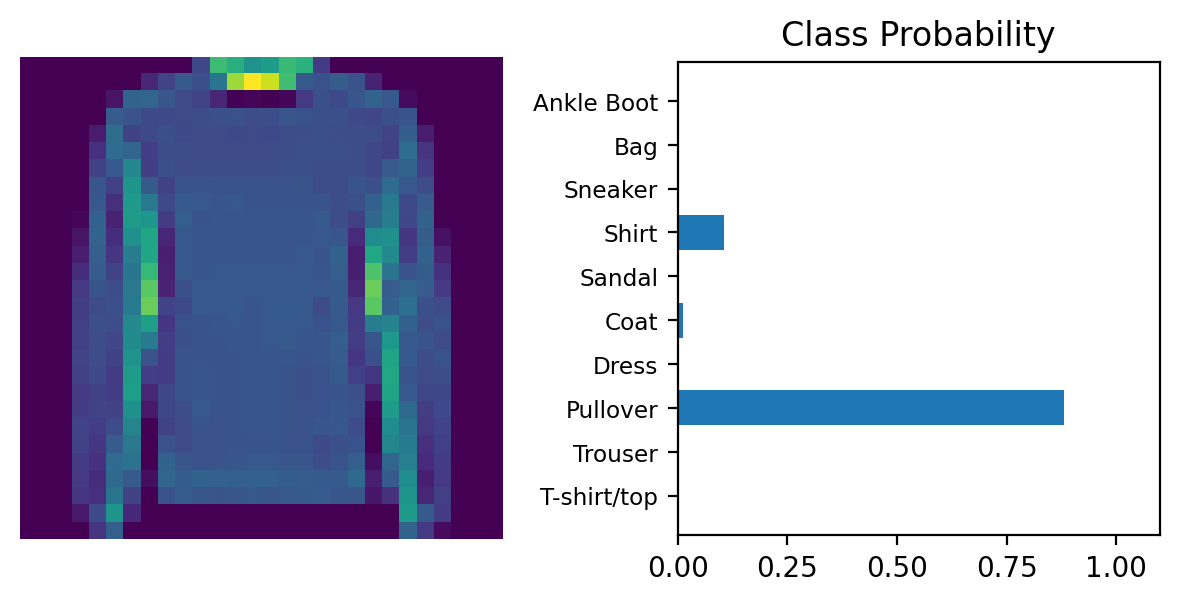

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

#  Calculate the class probabilities (softmax) for img
# Passar a imagem pela rede
with torch.no_grad():
    logits = model.forward(img)

# Calcular as probabilidades de classe usando softmax
ps = F.softmax(logits, dim=1)


# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')